<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/EDA_Gorjetas_Data_Visualization_com_Seaborn_tips_curso_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTANDO A BASE DE DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
#armazenando a leitura numa variavel
dados = pd.read_csv('tips.csv')


In [4]:
#conferindo uma amostra dos dados
dados.sample(10)

,total_bill,tip,dessert,day,time,size
97,12.03,1.50,Yes,Fri,Dinner,2
129,22.82,2.18,No,Thur,Lunch,3
177,14.48,2.00,Yes,Sun,Dinner,2
88,24.71,5.85,No,Thur,Lunch,2
179,34.63,3.55,Yes,Sun,Dinner,2
53,9.94,1.56,No,Sun,Dinner,2
33,20.69,2.45,No,Sat,Dinner,4
74,14.73,2.20,No,Sat,Dinner,2
140,17.47,3.50,No,Thur,Lunch,2
9,14.78,3.23,No,Sun,Dinner,2


# TRADUÇÃO DOS DADOS

In [5]:
#visualizando as colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

## Traduzindo o rótulo das colunas

In [6]:
#criando um dicionário para facilitar a renomeação
renomear = {'total_bill': 'valor_da_conta', 
            'tip': 'gorjeta', 
            'dessert': 'sobremesa', 
            'day': 'dia_da_semana', 
            'time': 'hora_do_dia', 
            'size': 'total_de_pessoas'}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
#mudando o nome da variável dados, aproveitando para renomear as colunas
gorjeta = dados.rename(columns=renomear)

In [9]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo os campos

In [10]:
#conferindo dados únicos em uma coluna
gorjeta.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {'No' : 'Não', 
           'Yes' : 'Sim'}

In [12]:
#mapeando o df com nosso dicionário sim_não
gorjeta.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [13]:
#fazendo a alteração
gorjeta.sobremesa = gorjeta.sobremesa.map(sim_nao)

In [14]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [15]:
#fazendo a mesma coisa para o dia da semana
gorjeta.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dia_semana = {'Sun' : 'Domingo', 
              'Sat' : 'Sábado', 
              'Thur' : 'Quinta', 
              'Fri' : 'Sexta'}

In [17]:
#alterando o dia da semana
gorjeta.dia_da_semana = gorjeta.dia_da_semana.map(dia_semana)

In [18]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [19]:
#fazendo com a hora do dia
gorjeta.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [20]:
hora = {'Dinner': 'Jantar',
        'Lunch' : 'Almoço'}

In [21]:
gorjeta.hora_do_dia = gorjeta.hora_do_dia.map(hora)

In [22]:
#Pegando uma amostra para visualizar dados diversos
gorjeta.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
124,12.48,2.52,Não,Quinta,Almoço,2
28,21.70,4.30,Não,Sábado,Jantar,2
29,19.65,3.00,Não,Sábado,Jantar,2
107,25.21,4.29,Sim,Sábado,Jantar,2
193,15.48,2.02,Sim,Quinta,Almoço,2
54,25.56,4.34,Não,Domingo,Jantar,4
182,45.35,3.50,Sim,Domingo,Jantar,3
87,18.28,4.00,Não,Quinta,Almoço,2
195,7.56,1.44,Não,Quinta,Almoço,2
122,14.26,2.50,Não,Quinta,Almoço,2


In [23]:
#conferindo a versão do seaborn
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, matplotlib, pandas, numpy
Required-by: missingno


# ANÁLISE 1 - VALOR DA CONTA E GORJETA

In [24]:
#relembrando as colunas
gorjeta.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

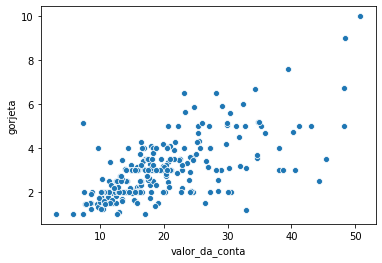

In [25]:
#criando um scatterplot - ele cria uma imagem que pode ser salva numa variável
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjeta)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [26]:
#vendo o tamanho dos dados
print(f'a base de dados contém {gorjeta.shape[0]} registros')
print(f'Registros não nulos: \n{gorjeta.count()}')

a base de dados contém 244 registros
Registros não nulos: 
valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64


## Criando o campo porcentagem

In [27]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [28]:
#criando a coluna dividindo o valor da gorjeta pelo valor da conta
gorjeta['porcentagem'] = gorjeta.gorjeta / gorjeta.valor_da_conta

In [29]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [30]:
#arredondando os dados da coluna porcentagem
gorjeta.porcentagem = gorjeta.porcentagem.round(2)

In [31]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


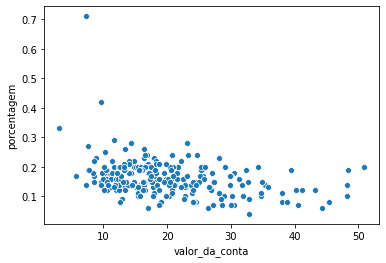

In [32]:
#visualizando o gráfico anterior com a porcentagem da gorjeta
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y = 'porcentagem', data=gorjeta)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

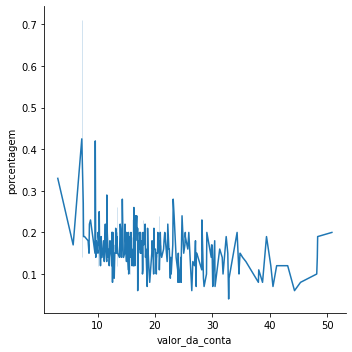

In [33]:
#gerando uma outra visualização, usando o formato de linha
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjeta)

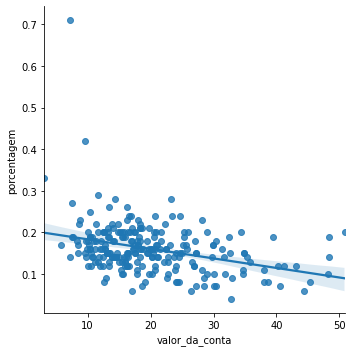

In [34]:
#verificando um terceiro gráfico
porcentagem_lmplot = sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjeta)

# ANÁLISE 2 - SOBREMESA

In [35]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [36]:
#visualizando todos os que pediram sobremesa
gorjeta[gorjeta.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [37]:
gorjeta[gorjeta.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [38]:
gorjeta[gorjeta.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


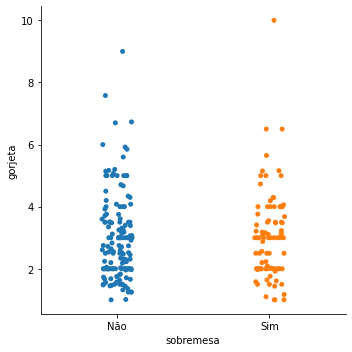

In [39]:
#fazendo um gráfico categórico
ax = sns.catplot(x='sobremesa', y='gorjeta', data=gorjeta)

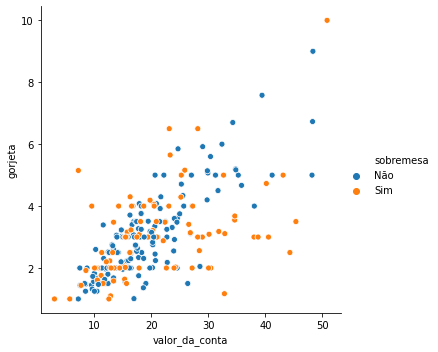

In [40]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta)

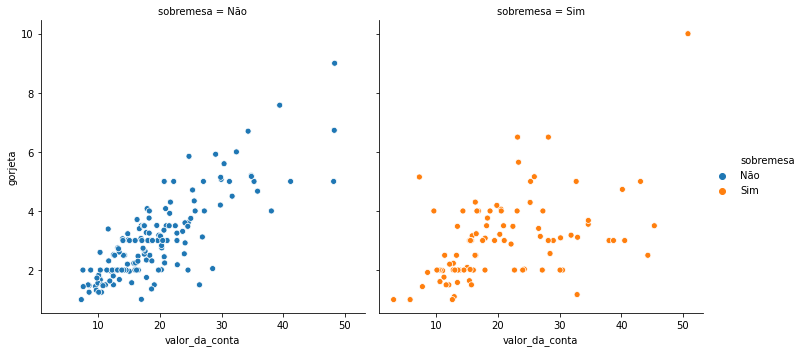

In [41]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta, col='sobremesa')

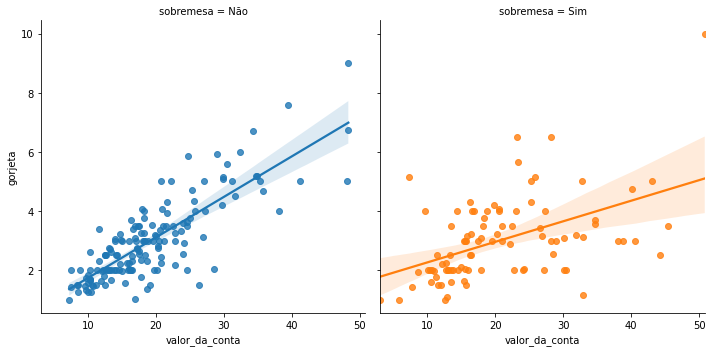

In [42]:
ax = sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta, col='sobremesa')

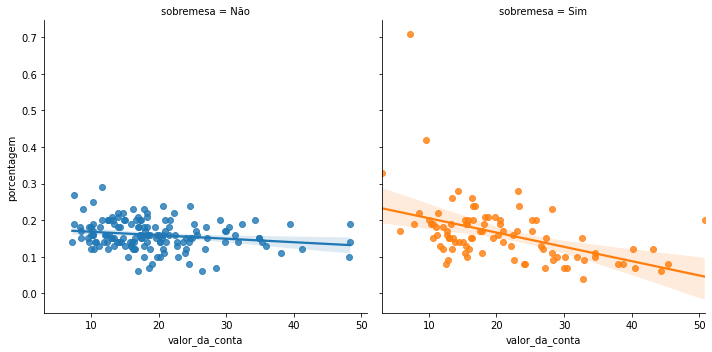

In [43]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', data=gorjeta, col='sobremesa')

**Visualmente existe uma diferença nas gorjetas entre quem pediu e quem não pediu sobremesa**

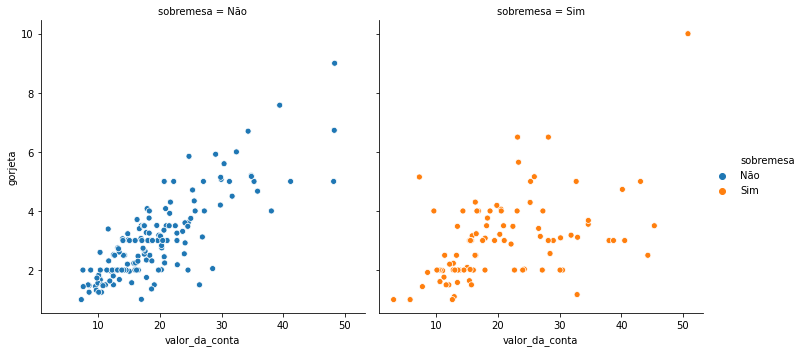

In [44]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjeta, col='sobremesa')

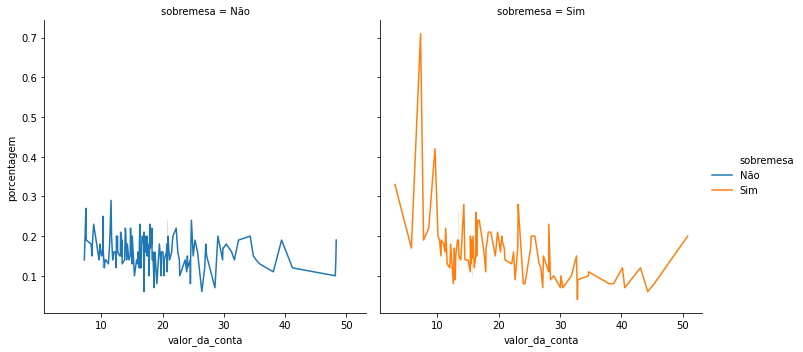

In [45]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', data=gorjeta, col='sobremesa', kind='line')

# TESTE DE HIPÓTESE

## **H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

## **H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [46]:
from scipy.stats import ranksums

In [47]:
sobremesa = gorjeta.query('sobremesa == "Sim"').porcentagem

In [48]:
sem_sobremesa = gorjeta.query('sobremesa == "Não"').porcentagem

In [49]:
_, p_value = ranksums(sobremesa, sem_sobremesa)

In [50]:
print(f'O valor do p_value é {p_value}')

O valor do p_value é 0.5266635660124415


**Usando o nível de confiança de 95% não é possível rejeitar a hipótese nula**

# ANÁLISE 3 - DIAS DA SEMANA

In [51]:
gorjeta.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [52]:
gorjeta.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

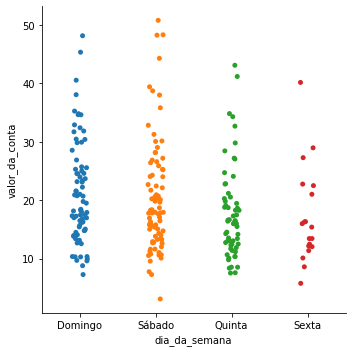

In [57]:
#conferindo dias da semana X valor da conta separadamente
ax = sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjeta)

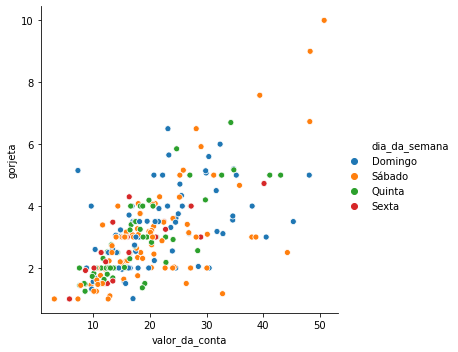

In [56]:
#conferindo gorjeta X valor da conta por dia da semana num único plot
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjeta)

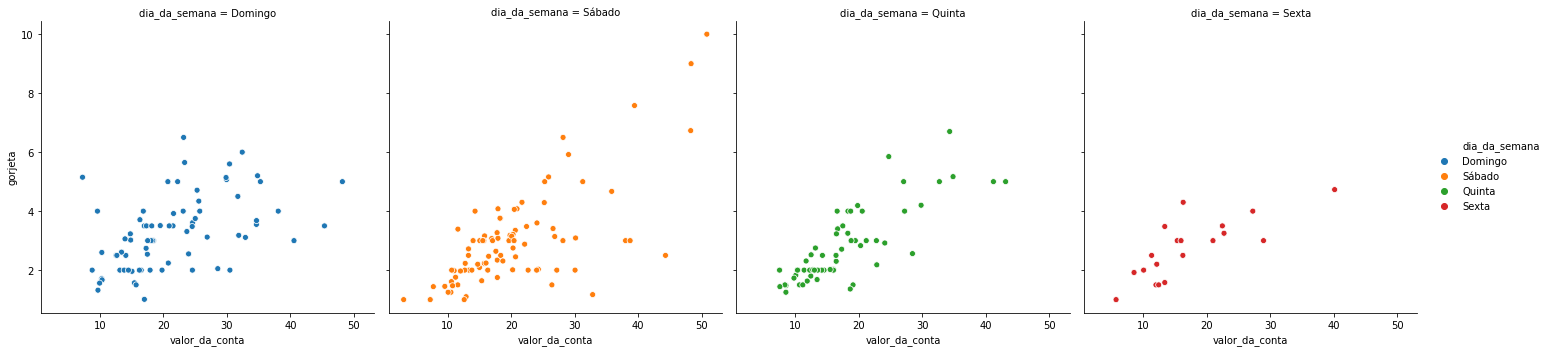

In [58]:
#conferindo gorjeta X valor da conta por dia da semana em plots separados
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana' ,data=gorjeta)

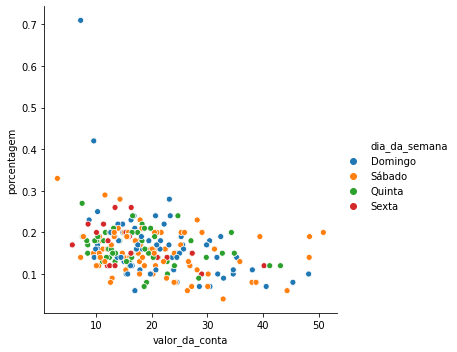

In [59]:
#conferindo a porcentagem da gorjeta X valor da conta por dia da semana num único plot
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjeta)

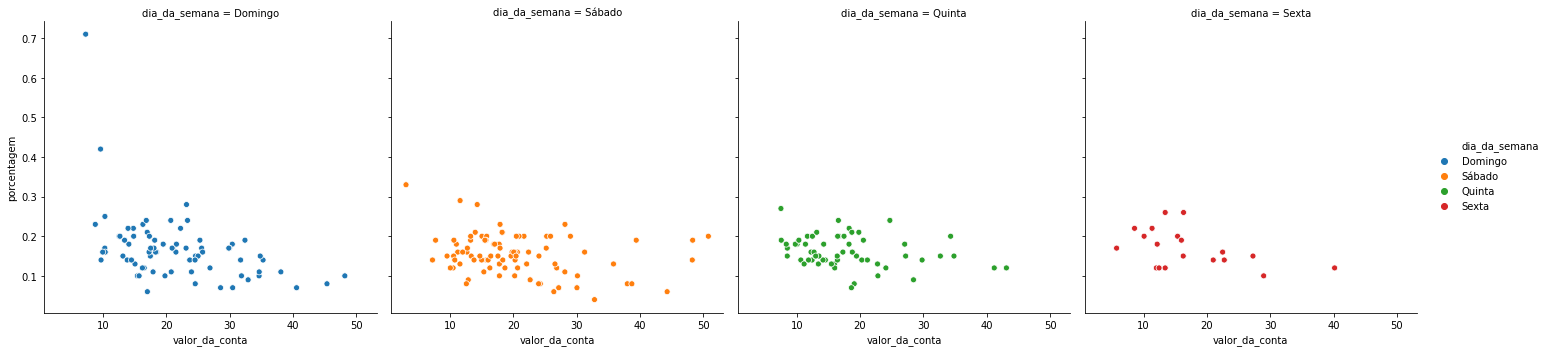

In [61]:
#conferindo a porcentagem da gorjeta X valor da conta por dia da semana em plots separados
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana',data=gorjeta)

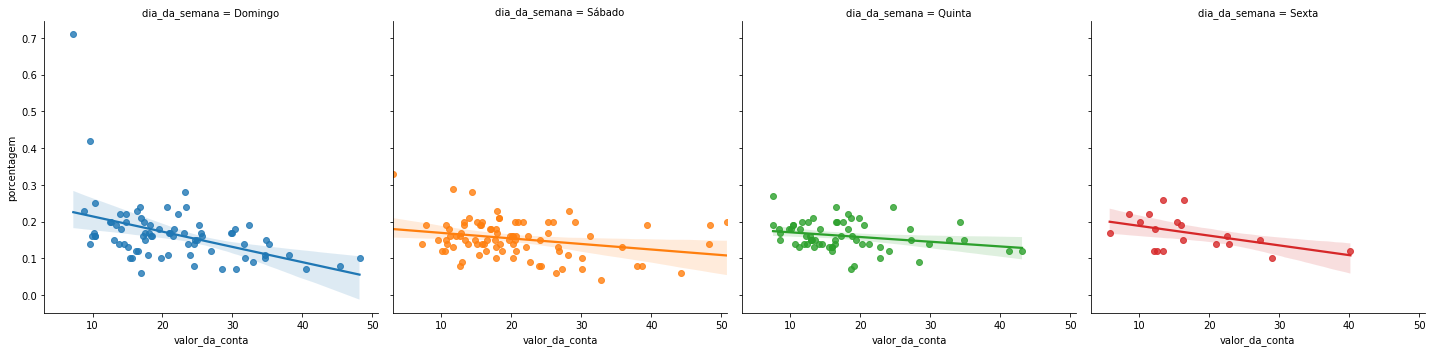

In [62]:
#conferindo a porcentagem da gorjeta X valor da conta por dia da semana em plots separados criando uma linha de regressão
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana',data=gorjeta)

In [64]:
media_geral_gorjetas = gorjeta.gorjeta.mean()

In [65]:
print(f'A média geral das gorjetas é de: {media_geral_gorjetas}')

A média geral das gorjetas é de: 2.9982786885245902


In [70]:
gorjeta.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [72]:
#frequência dos dias
gorjeta.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

## **H<sup>null</sup>**
> **A distribuição do valor da conta é igual no Sábado e no Domingo**

## **H<sup>alt</sup>**
> **A distribuição do valor da conta NÃO é igual no Sábado e no Domingo**

In [75]:
valor_conta_domingo = gorjeta.query('dia_da_semana =="Domingo"').valor_da_conta

In [76]:
valor_conta_sabado = gorjeta.query('dia_da_semana =="Sábado"').valor_da_conta

In [78]:
_, p_value = ranksums(valor_conta_domingo, valor_conta_sabado)

In [79]:
p_value

0.3576728477868443

**Com 95% de confiança, não podemos rejeitar a hipótese nula**

**Exercício** 

Comparando os dias de Sábado e de Quinta

In [80]:
valor_conta_quinta = gorjeta.query('dia_da_semana =="Quinta"').valor_da_conta

In [82]:
ranksums(valor_conta_sabado, valor_conta_quinta)

RanksumsResult(statistic=1.9891147978189907, pvalue=0.046688533353323416)

**Com 95% de confiança, rejeitamos a hipótese nula de que o valor da conta no Sábado é pertencente segue a mesma distribuição do valor da conta na Quinta Feira**

# ANÁLISE 4 - HORA DO DIA

In [83]:
gorjeta.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

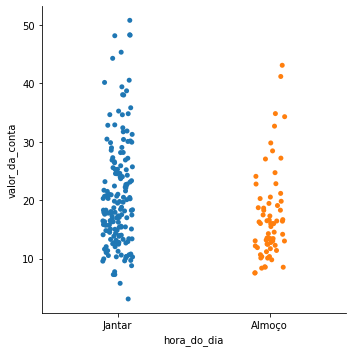

In [85]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

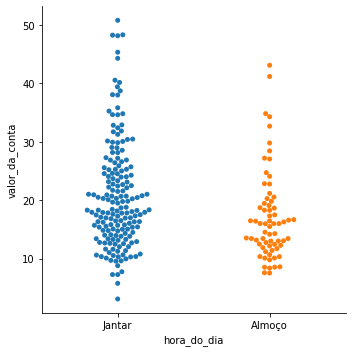

In [86]:
ax = sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta, kind='swarm')

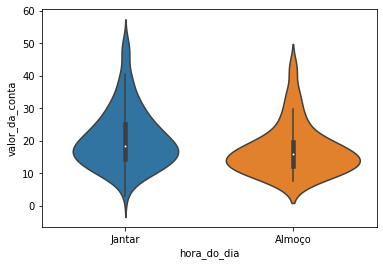

In [92]:
ax= sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

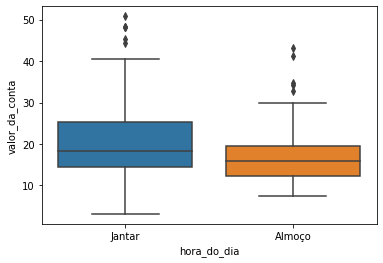

In [91]:
ax= sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjeta)

In [95]:
almoco = gorjeta.query('hora_do_dia =="Almoço"').valor_da_conta

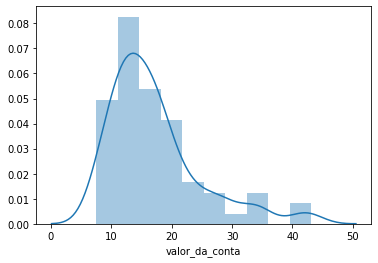

In [96]:
ax = sns.distplot(almoco)

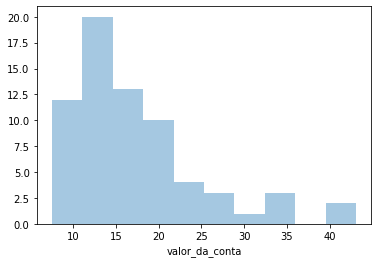

In [97]:
ax = sns.distplot(almoco, kde=False)

In [98]:
jantar = gorjeta.query('hora_do_dia =="Jantar"').valor_da_conta

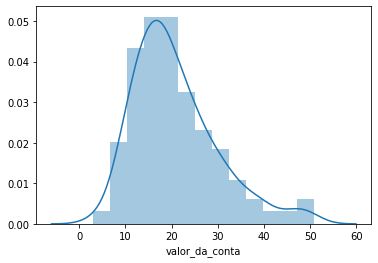

In [99]:
ax = sns.distplot(jantar)

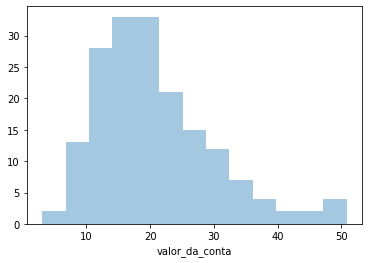

In [100]:
ax = sns.distplot(jantar, kde=False)

In [102]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese

## **H<sup>null</sup>**
> **A distribuição do valor da conta é igual no almoço e no jantar**

## **H<alt>null</sup>**
> **A distribuição do valor da conta NÃO é igual no almoço e no jantar**

In [104]:
_, p_value = ranksums(almoco,jantar)

In [105]:
p_value

0.0011791039723641672

In [106]:
print(f'o valor do p-value é de {p_value}')

o valor do p-value é de 0.0011791039723641672


**Neste caso, com 95% de confiança, podemos rejeitar a hipótese nula e aceitar a hipótese alternativa**

## Teste de Hipótese 2

## **H<sup>null</sup>**
> **A distribuição da porcentagem da gorjeta é igual no almoço e no jantar**

## **H<alt>null</sup>**
> **A distribuição da porcentagem da gorjeta NÃO é igual no almoço e no jantar**

In [109]:
porcentagem_almoco = gorjeta.query('hora_do_dia == "Almoço"').porcentagem

In [110]:
porcentagem_jantar = gorjeta.query('hora_do_dia == "Jantar"').porcentagem

In [112]:
r2 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [113]:
r2.pvalue

0.2602493995587126

Neste caso, com 95% de confiança, não conseguimos rejeitar a hipótese nula de que a distribuição da porcentagem da gorjeta é igual no almoço e no jantar